<a href="https://colab.research.google.com/github/GarimaGarima/TensorFlow/blob/master/Model_with_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow
from tensorflow import keras

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [0]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [0]:
image_size = x_train.shape[1]
input_size = image_size * image_size
print(input_size)

784


In [0]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [0]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [0]:
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation("relu"))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation("softmax"))
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_

In [0]:
model.compile(loss= "categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [0]:
print(y_train[30000])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
results = model.fit(x_train,y_train, epochs=10 , batch_size= batch_size, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0622 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0485 - acc: 0.9841 - val_loss: 0.0671 - val_acc: 0.9813
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0490 - acc: 0.9843 - val_loss: 0.0640 - val_acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0492 - acc: 0.9846 - val_loss: 0.0635 - val_acc: 0.9820
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0456 - acc: 0.9853 - val_loss: 0.0666 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0453 - acc: 0.9858 - val_loss: 0.0648 - val_acc: 0.9830
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0459 - acc: 0.9851 - val_loss: 0.0669 - val_acc

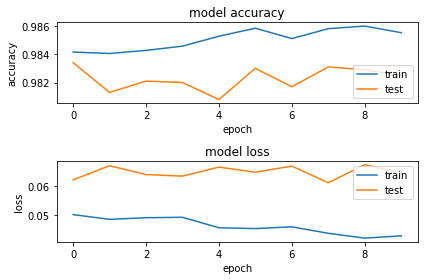

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [0]:
loss, acc = model.evaluate(x_test, y_test, batch_size= batch_size)

10000/10000 [==============================] - 0s 14us/step


In [0]:
print(acc)
print(loss)

0.9812
0.06310796311367303


In [0]:
Bset_images = x_train[10000:]
Bset_label = y_train[10000:]
Aset_images = x_train[:10000]
Aset_label = y_train[:10000]
Aset_labels = [np.mod(x+1,10) for x in Aset_label]

In [0]:
print(Aset_labels[0])

[1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]


In [0]:
import numpy as np

shuffled_labels = np.concatenate((Aset_labels , Bset_labels))

In [0]:
print(Aset_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
print(shuffled_labels[30000])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:

model_1 = Sequential()
model_1.add(Dense(hidden_units, input_dim = input_size))
model_1.add(Activation("relu"))
model_1.add(Dropout(dropout))
model_1.add(Dense(hidden_units))
model_1.add(Activation("relu"))
model_1.add(Dropout(dropout))
model_1.add(Dense(num_labels))
model_1.add(Activation("softmax"))
model_1.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [0]:
model_1.compile(loss= "categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [0]:
results_1 = model_1.fit(x_train, shuffled_labels, epochs=10 , shuffle = True, batch_size= batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 1.6784 - acc: 0.5334 - val_loss: 0.8038 - val_acc: 0.9560
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 1.6744 - acc: 0.5342 - val_loss: 0.8164 - val_acc: 0.9548
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 1.6667 - acc: 0.5349 - val_loss: 0.8146 - val_acc: 0.9543
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 1.6626 - acc: 0.5350 - val_loss: 0.8412 - val_acc: 0.9496
Epoch 5/10
60000/60000 [==============================] - 2s 32us/step - loss: 1.6607 - acc: 0.5356 - val_loss: 0.7904 - val_acc: 0.9556
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 1.6534 - acc: 0.5359 - val_loss: 0.7953 - val_acc: 0.9537
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 1.6493 - acc: 0.5364 - val_loss: 0.7774 - val_acc

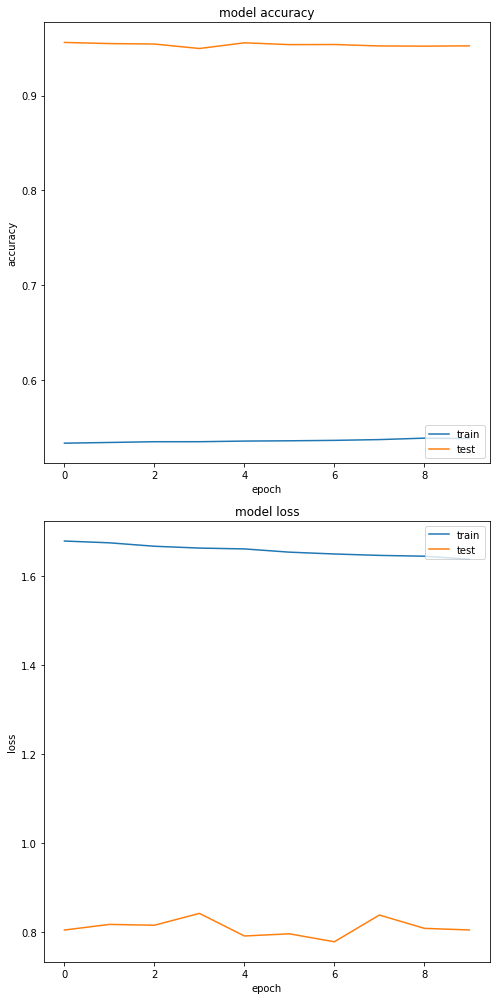

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(results_1.history['acc'])
plt.plot(results_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(results_1.history['loss'])
plt.plot(results_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [0]:
loss_1, acc_1 = model_1.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/step


In [0]:
print(acc_1)
print(loss_1)

0.9524
0.8039535349845887


In [0]:

model_2 = Sequential()
model_2.add(Dense(hidden_units, input_dim = input_size))
model_2.add(Activation("relu"))
model_2.add(Dropout(dropout))
model_2.add(Dense(hidden_units))
model_2.add(Activation("relu"))
model_2.add(Dropout(dropout))
model_2.add(Dense(num_labels))
model_2.add(Activation("softmax"))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [0]:
model_2.compile(loss= "categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [0]:
results_2 = model_2.fit(Aset_images, Aset_labels, epochs=10 , batch_size= batch_size, validation_data=(x_test, y_test))

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 1s 34us/step - loss: 0.0446 - acc: 0.9853 - val_loss: 0.0976 - val_acc: 0.9765
Epoch 2/10
30000/30000 [==============================] - 1s 35us/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0932 - val_acc: 0.9781
Epoch 3/10
30000/30000 [==============================] - 1s 35us/step - loss: 0.0375 - acc: 0.9875 - val_loss: 0.0889 - val_acc: 0.9778
Epoch 4/10
30000/30000 [==============================] - 1s 38us/step - loss: 0.0372 - acc: 0.9877 - val_loss: 0.0966 - val_acc: 0.9772
Epoch 5/10
30000/30000 [==============================] - 1s 36us/step - loss: 0.0390 - acc: 0.9863 - val_loss: 0.0882 - val_acc: 0.9785
Epoch 6/10
30000/30000 [==============================] - 1s 33us/step - loss: 0.0339 - acc: 0.9890 - val_loss: 0.0952 - val_acc: 0.9773
Epoch 7/10
30000/30000 [==============================] - 1s 33us/step - loss: 0.0390 - acc: 0.9875 - val_loss: 0.0948 - val_acc

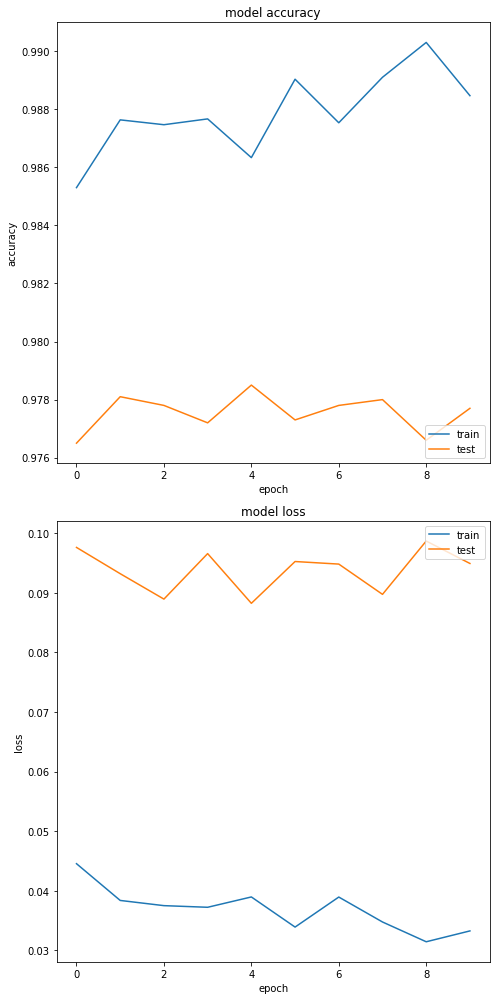

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(results_2.history['acc'])
plt.plot(results_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(results_2.history['loss'])
plt.plot(results_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [0]:
loss_2 , acc_2 = model_2.evaluate(x_test,y_test,batch_size= batch_size)

10000/10000 [==============================] - 0s 13us/step


In [0]:
print(acc_2)
print(loss_2)

0.9777
0.09492093604023102


In [0]:
model_3 = Sequential()
model_3.add(Dense(hidden_units, input_dim = input_size))
model_3.add(Activation("relu"))
model_3.add(Dropout(dropout))
model_3.add(Dense(hidden_units))
model_3.add(Activation("relu"))
model_3.add(Dropout(dropout))
model_3.add(Dense(num_labels))
model_3.add(Activation("softmax"))
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [0]:
model_3.compile(loss= "categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [0]:
results_3 = model_3.fit(Bset_images, Bset_labels, epochs=10 , batch_size= batch_size, validation_data=(x_test, y_test))

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 1s 37us/step - loss: 2.2903 - acc: 0.1228 - val_loss: 2.3343 - val_acc: 0.1107
Epoch 2/10
30000/30000 [==============================] - 1s 39us/step - loss: 2.2862 - acc: 0.1271 - val_loss: 2.3128 - val_acc: 0.1214
Epoch 3/10
30000/30000 [==============================] - 1s 38us/step - loss: 2.2830 - acc: 0.1298 - val_loss: 2.3279 - val_acc: 0.0560
Epoch 4/10
30000/30000 [==============================] - 1s 35us/step - loss: 2.2768 - acc: 0.1342 - val_loss: 2.3065 - val_acc: 0.1109
Epoch 5/10
30000/30000 [==============================] - 1s 37us/step - loss: 2.2719 - acc: 0.1358 - val_loss: 2.3073 - val_acc: 0.1121
Epoch 6/10
30000/30000 [==============================] - 1s 38us/step - loss: 2.2666 - acc: 0.1427 - val_loss: 2.3273 - val_acc: 0.1131
Epoch 7/10
30000/30000 [==============================] - 1s 43us/step - loss: 2.2588 - acc: 0.1427 - val_loss: 2.3241 - val_acc

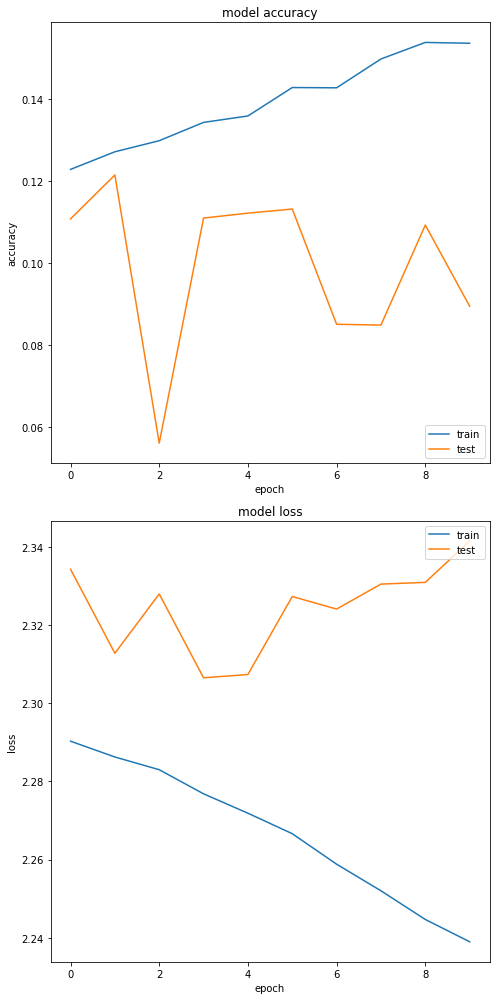

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(results_3.history['acc'])
plt.plot(results_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(results_3.history['loss'])
plt.plot(results_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [0]:
loss3, acc3 = model_3.evaluate(x_test,y_test, batch_size= batch_size)

10000/10000 [==============================] - 0s 13us/step


In [0]:
print(acc3)
print(loss3)

0.0894
2.3414521545410154
